✅ All libraries imported!
📄 Sample texts loaded
Original: 424 characters
Plagiarized: 379 characters
Different: 302 characters
📚 TextPreprocessor initialized
   Stop words: 198
📝 TESTING PREPROCESSING STEPS
Original: Machine learning is TRANSFORMING the world! It's amazing.

Step 1: Clean Text
   → machine learning is transforming the world! it's amazing.

Step 2: Remove Punctuation
   → machine learning is transforming the world its amazing

Step 3: Tokenize
   → ['machine', 'learning', 'is', 'transforming', 'the', 'world', 'its', 'amazing']

Step 4: Remove Stop Words
   → ['machine', 'learning', 'transforming', 'world', 'amazing']

Step 5: Lemmatize
   → ['machine', 'learning', 'transforming', 'world', 'amazing']

📄 PROCESSING SAMPLE DOCUMENTS

Original Document:
------------------------------------------------------------
Original words: 62
After preprocessing: 38
Reduction: 38.71%

Preview: machine learning subset artificial intelligence focus developing algorithm learn make predic

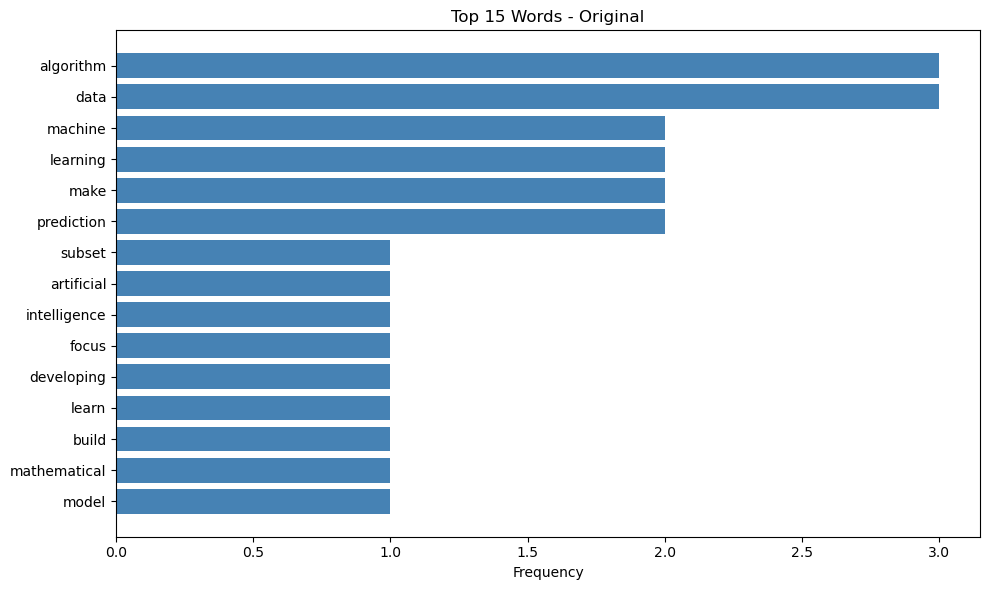

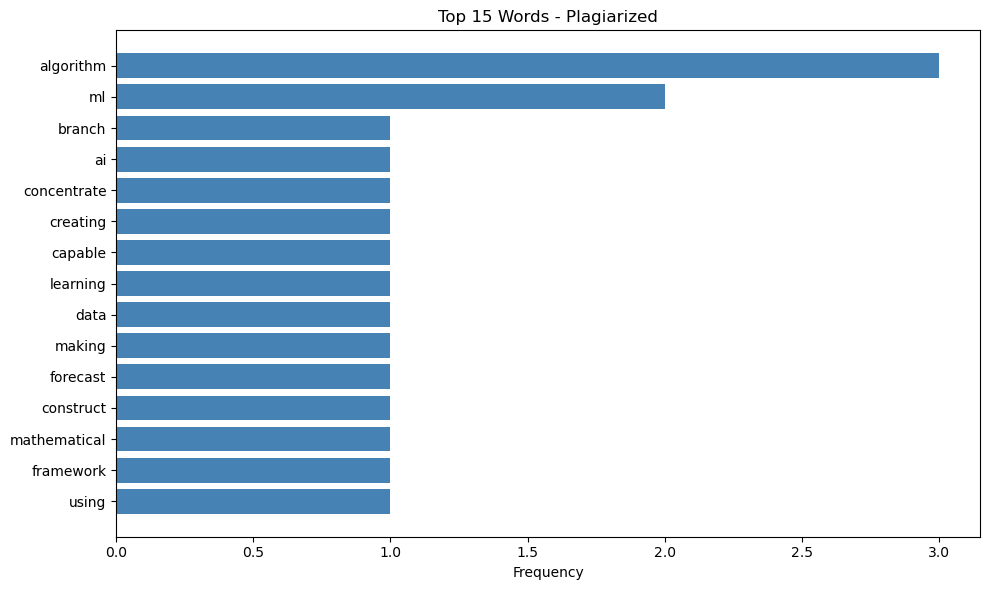

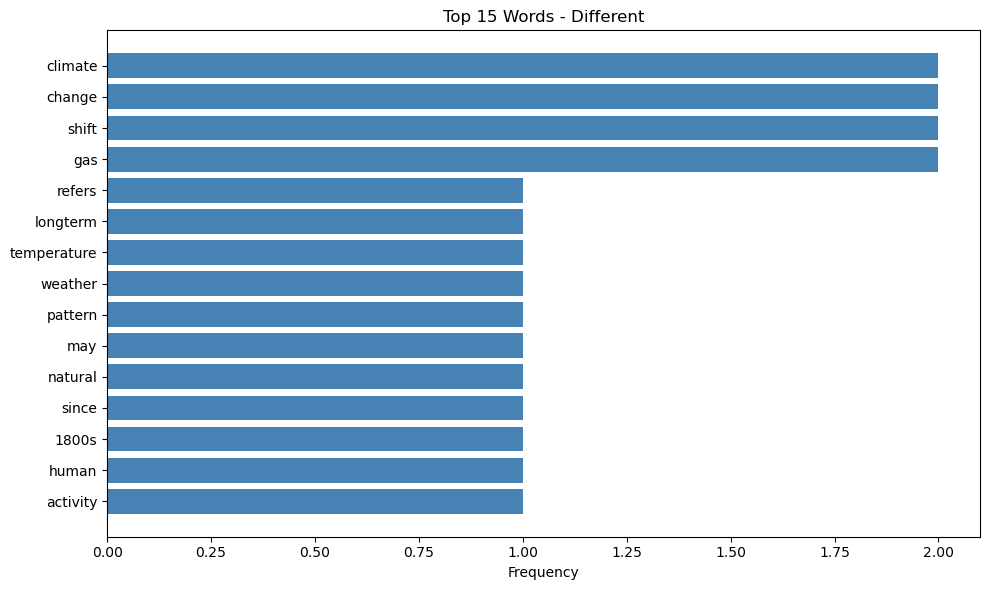

📊 Document Comparison
      Document  Total Words  Unique Words  Vocabulary Richness
0     Original           38            30                0.789
1  Plagiarized           38            35                0.921
2    Different           31            27                0.871


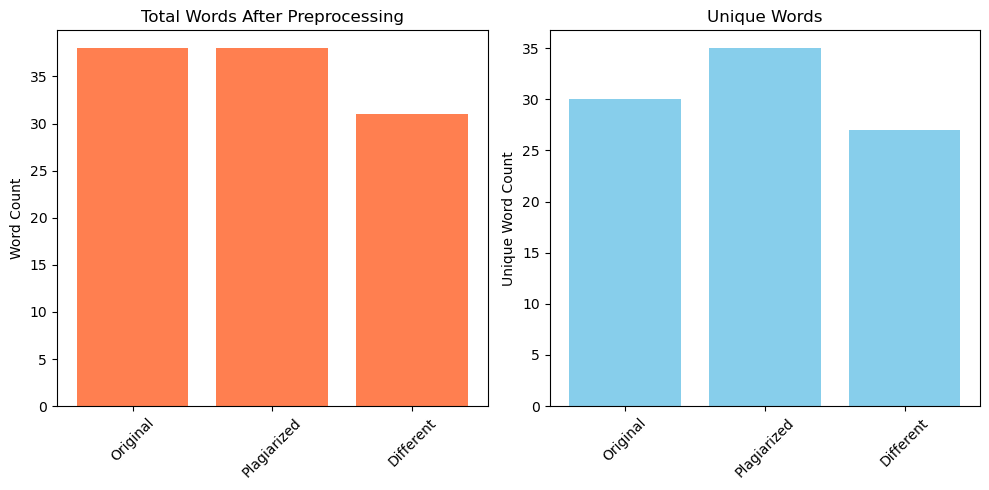

🔍 COMPARING DOCUMENTS

Original vs Plagiarized:
Common words: 9
Words: ['algorithm', 'application', 'data', 'learning', 'mathematical', 'prediction', 'sample', 'training', 'without']

Original vs Different:
Common words: 0
Words: []

📊 Overlap Statistics:
Original vs Plagiarized: 30.0%
Original vs Different: 0.0%
✅ Saved processed documents to: ..\data\processed
   📄 original_processed.txt
   📄 plagiarized_processed.txt
   📄 different_processed.txt
✨ TEXT PREPROCESSING COMPLETE!

✅ What We Built:
   1. TextPreprocessor class with full pipeline
   2. Text cleaning and normalization
   3. Tokenization
   4. Stop word removal
   5. Lemmatization
   6. Word frequency analysis
   7. Document comparison tools

📊 Results:
   • Processed 3 sample documents
   • Found 9 common words (Original vs Plagiarized)
   • Overlap: 30.0% (indicates potential plagiarism)

🎯 Next Step:
   • Create Notebook 4: Similarity Detection
   • Implement TF-IDF vectorization
   • Calculate cosine similarity scores



In [1]:
import os
import sys
from pathlib import Path
import re
import string

import numpy as np
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm

import warnings
warnings.filterwarnings('ignore')

print("✅ All libraries imported!")

sample_original = """
Machine learning is a subset of artificial intelligence that focuses on 
developing algorithms that can learn from and make predictions on data. 
These algorithms build mathematical models based on sample data, known as 
training data, to make predictions or decisions without being explicitly 
programmed to do so. Machine learning algorithms are used in various 
applications such as email filtering and computer vision.
"""

sample_plagiarized = """
ML is a branch of AI that concentrates on creating algorithms capable of 
learning from data and making forecasts. Such algorithms construct 
mathematical frameworks using sample information, called training datasets, 
to generate predictions or choices without explicit programming. ML algorithms 
find applications in diverse fields like spam detection and image recognition.
"""

sample_different = """
Climate change refers to long-term shifts in temperatures and weather patterns. 
These shifts may be natural, but since the 1800s, human activities have been 
the main driver of climate change, primarily due to the burning of fossil fuels 
like coal, oil, and gas, which produces heat-trapping gases.
"""

print("📄 Sample texts loaded")
print(f"Original: {len(sample_original)} characters")
print(f"Plagiarized: {len(sample_plagiarized)} characters")
print(f"Different: {len(sample_different)} characters")

class TextPreprocessor:
    
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        self.stemmer = PorterStemmer()
        self.lemmatizer = WordNetLemmatizer()
        print("📚 TextPreprocessor initialized")
        print(f"   Stop words: {len(self.stop_words)}")
    
    def clean_text(self, text):
        text = ' '.join(text.split())
        text = text.lower()
        return text
    
    def remove_punctuation(self, text):
        translator = str.maketrans('', '', string.punctuation)
        return text.translate(translator)
    
    def tokenize(self, text):
        return word_tokenize(text)
    
    def remove_stopwords(self, tokens):
        return [word for word in tokens if word.lower() not in self.stop_words]
    
    def stem_words(self, tokens):
        return [self.stemmer.stem(word) for word in tokens]
    
    def lemmatize_words(self, tokens):
        return [self.lemmatizer.lemmatize(word) for word in tokens]
    
    def preprocess(self, text, remove_punct=True, remove_stops=True, 
                   use_stemming=False, use_lemmatization=True):
        text = self.clean_text(text)
        
        if remove_punct:
            text = self.remove_punctuation(text)
        
        tokens = self.tokenize(text)
        
        if remove_stops:
            tokens = self.remove_stopwords(tokens)
        
        if use_stemming:
            tokens = self.stem_words(tokens)
        elif use_lemmatization:
            tokens = self.lemmatize_words(tokens)
        
        return ' '.join(tokens)
    
    def get_statistics(self, original_text, processed_text):
        orig_words = len(original_text.split())
        proc_words = len(processed_text.split())
        reduction = ((orig_words - proc_words) / orig_words) * 100
        
        return {
            'original_words': orig_words,
            'processed_words': proc_words,
            'reduction_percent': round(reduction, 2),
            'original_chars': len(original_text),
            'processed_chars': len(processed_text)
        }

preprocessor = TextPreprocessor()

test_text = "Machine learning is TRANSFORMING the world! It's amazing."

print("📝 TESTING PREPROCESSING STEPS")
print("="*60)
print(f"Original: {test_text}\n")

print("Step 1: Clean Text")
cleaned = preprocessor.clean_text(test_text)
print(f"   → {cleaned}\n")

print("Step 2: Remove Punctuation")
no_punct = preprocessor.remove_punctuation(cleaned)
print(f"   → {no_punct}\n")

print("Step 3: Tokenize")
tokens = preprocessor.tokenize(no_punct)
print(f"   → {tokens}\n")

print("Step 4: Remove Stop Words")
no_stops = preprocessor.remove_stopwords(tokens)
print(f"   → {no_stops}\n")

print("Step 5: Lemmatize")
lemmatized = preprocessor.lemmatize_words(no_stops)
print(f"   → {lemmatized}\n")

print("="*60)

print("📄 PROCESSING SAMPLE DOCUMENTS")
print("="*60)

documents = {
    'Original': sample_original,
    'Plagiarized': sample_plagiarized,
    'Different': sample_different
}

processed_docs = {}

for name, text in documents.items():
    print(f"\n{name} Document:")
    print("-"*60)
    
    processed = preprocessor.preprocess(text)
    processed_docs[name] = processed
    
    stats = preprocessor.get_statistics(text, processed)
    
    print(f"Original words: {stats['original_words']}")
    print(f"After preprocessing: {stats['processed_words']}")
    print(f"Reduction: {stats['reduction_percent']}%")
    
    preview = processed[:150] + "..." if len(processed) > 150 else processed
    print(f"\nPreview: {preview}")

print("\n" + "="*60)

from collections import Counter

def plot_word_frequency(text, title, top_n=15):
    words = text.split()
    word_counts = Counter(words)
    top_words = word_counts.most_common(top_n)
    
    words_list, counts = zip(*top_words)
    
    plt.figure(figsize=(10, 6))
    plt.barh(words_list, counts, color='steelblue')
    plt.xlabel('Frequency')
    plt.title(f'Top {top_n} Words - {title}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

for name, text in processed_docs.items():
    plot_word_frequency(text, name)

comparison_data = []

for name, text in processed_docs.items():
    words = text.split()
    unique_words = len(set(words))
    total_words = len(words)
    
    comparison_data.append({
        'Document': name,
        'Total Words': total_words,
        'Unique Words': unique_words,
        'Vocabulary Richness': round(unique_words/total_words, 3)
    })

df_comparison = pd.DataFrame(comparison_data)
print("📊 Document Comparison")
print("="*60)
print(df_comparison)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(df_comparison['Document'], df_comparison['Total Words'], color='coral')
plt.title('Total Words After Preprocessing')
plt.ylabel('Word Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(df_comparison['Document'], df_comparison['Unique Words'], color='skyblue')
plt.title('Unique Words')
plt.ylabel('Unique Word Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

def find_common_words(text1, text2, min_length=4):
    words1 = set(text1.split())
    words2 = set(text2.split())
    
    words1 = {w for w in words1 if len(w) >= min_length}
    words2 = {w for w in words2 if len(w) >= min_length}
    
    common = words1.intersection(words2)
    
    return sorted(common)

print("🔍 COMPARING DOCUMENTS")
print("="*60)

common_orig_plag = find_common_words(
    processed_docs['Original'], 
    processed_docs['Plagiarized']
)

common_orig_diff = find_common_words(
    processed_docs['Original'], 
    processed_docs['Different']
)

print(f"\nOriginal vs Plagiarized:")
print(f"Common words: {len(common_orig_plag)}")
print(f"Words: {common_orig_plag[:20]}")

print(f"\nOriginal vs Different:")
print(f"Common words: {len(common_orig_diff)}")
print(f"Words: {common_orig_diff[:20]}")

words_orig = len(set(processed_docs['Original'].split()))
overlap_plag = (len(common_orig_plag) / words_orig) * 100
overlap_diff = (len(common_orig_diff) / words_orig) * 100

print(f"\n📊 Overlap Statistics:")
print(f"Original vs Plagiarized: {overlap_plag:.1f}%")
print(f"Original vs Different: {overlap_diff:.1f}%")

import pickle

output_dir = Path("../data/processed")
output_dir.mkdir(parents=True, exist_ok=True)

with open(output_dir / "processed_docs.pkl", 'wb') as f:
    pickle.dump(processed_docs, f)

print(f"✅ Saved processed documents to: {output_dir}")

for name, text in processed_docs.items():
    filename = output_dir / f"{name.lower()}_processed.txt"
    with open(filename, 'w', encoding='utf-8') as f:
        f.write(text)
    print(f"   📄 {filename.name}")

def print_completion():
    print("="*60)
    print("✨ TEXT PREPROCESSING COMPLETE!")
    print("="*60)
    
    print("\n✅ What We Built:")
    features = [
        "TextPreprocessor class with full pipeline",
        "Text cleaning and normalization",
        "Tokenization",
        "Stop word removal",
        "Lemmatization",
        "Word frequency analysis",
        "Document comparison tools"
    ]
    
    for i, feature in enumerate(features, 1):
        print(f"   {i}. {feature}")
    
    print("\n📊 Results:")
    print(f"   • Processed {len(documents)} sample documents")
    print(f"   • Found {len(common_orig_plag)} common words (Original vs Plagiarized)")
    print(f"   • Overlap: {overlap_plag:.1f}% (indicates potential plagiarism)")
    
    print("\n🎯 Next Step:")
    print("   • Create Notebook 4: Similarity Detection")
    print("   • Implement TF-IDF vectorization")
    print("   • Calculate cosine similarity scores")
    
    print("\n" + "="*60)

print_completion()